### Demonstration of an evaluation based on the MCTSAgent

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import chess
import chess.variant
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../../../')
from DeepCrazyhouse.src.runtime.color_logger import enable_color_logging
from DeepCrazyhouse.src.domain.agent.neural_net_api import NeuralNetAPI
from DeepCrazyhouse.src.domain.agent.player.mcts_agent import MCTSAgent
from DeepCrazyhouse.src.domain.agent.player.raw_net_agent import RawNetAgent
from DeepCrazyhouse.src.domain.crazyhouse.game_state import GameState
from DeepCrazyhouse.src.runtime.color_logger import enable_color_logging
from time import time
%matplotlib inline
plt.style.use('seaborn-whitegrid')
enable_color_logging()

In [4]:
batch_size = 8 #32 #8
threads = 16

In [5]:
nets = []
for idx in range(2):
    nets.append(NeuralNetAPI(ctx='gpu', batch_size=batch_size))

self.symbol_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/symbol/model-1.25948-0.589-symbol.json
self.params_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/params/model-1.25948-0.589-0246.params
self.symbol_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/symbol/model-1.25948-0.589-symbol.json
self.params_path: /media/queensgambit/5C483A84483A5CC8/Deep_Learning/data/lichess/Crazyhouse/model/params/model-1.25948-0.589-0246.params


In [6]:
raw_agent = RawNetAgent(nets[0])

In [7]:
mcts_agent = MCTSAgent(nets, threads=threads,
                       playouts_empty_pockets=4096*5, playouts_filled_pockets=4096*5,
                       #playouts_empty_pockets=800, playouts_filled_pockets=800,
                 cpuct=2.5, dirichlet_epsilon=.25, dirichlet_alpha=0.2, batch_size=batch_size, q_value_weight=0.7,
                 max_search_depth=40, temperature=.07, virtual_loss=6, verbose=True, temperature_moves=0,
                 min_movetime=60000*1, check_mate_in_one=False, use_oscillating_cpuct=True, use_pruning=False, opening_guard_moves=0)

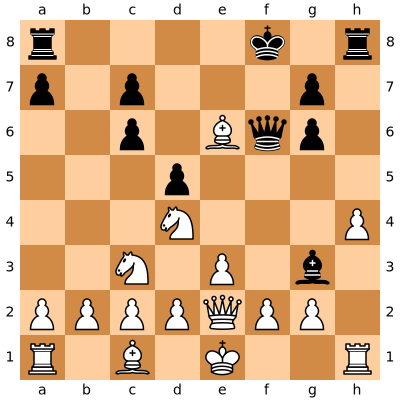

In [25]:
board = chess.variant.CrazyhouseBoard()

board.push_uci('e2e4')
#board.push_uci('e7e6')

fen = 'rnbqkb1r/ppp1pppp/5n2/3P4/8/8/PPPP1PPP/RNBQKBNR/P w KQkq - 1 3'
fen = 'rnb2rk1/p3bppp/2p5/3p2P1/4n3/8/PPPPBPPP/RNB1K1NR/QPPq w KQ - 0 11'
#fen = 'r1b1kbnr/ppp1pppp/2n5/3q4/3P4/8/PPP1NPPP/RNBQKB1R/Pp b KQkq - 1 4'
#fen = 'r1b1k2r/ppp2ppp/2n5/3np3/3P4/2PBP3/PpPB1PPP/1Q2K1NR/QNrb b Kkq - 27 14'
#fen = 'r1bb4/ppp2pkp/5npb/4p3/4P3/2N5/PPP1BPPP/3RK2R/QNRqpnp w K - 3 16'
#fen = '3R1b2/1bP1kp2/3Npn1p/3p4/5p2/5N1b/PPP2P1P/5Q1K/RPRPRQPnpbp b - - 4 36'
#fen = 'r3k1nr/ppp2ppp/2n5/8/q7/Pp6/1PnRN1PP/1K3B1R/BBQBppppp b kq - 3 27'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1/Qrbbpbb b - - 0 27'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1/Qrbbpbb b - - 0 30'
#fen = 'rn2N2k/pp5p/3pp1pN/3p4/5P2/3P1p2/PP3RPP/RN4K1/QQprbbpbb b - - 1 30'

# Test positions
#fen = '3R1b2/1bP1kp2/3Npn1p/3p4/5p2/5N1b/PPP1QP1P/3R1RK1/QPpprnpbp b - - 0 29'
fen = 'rn2N2k/pp5p/3pp1pN/3p4/3q1P2/3P1p2/PP3PPP/RN3RK1[Qrbbpbb] b - - 3 30'
#fen = 'q6r/p2P1pkp/1p1b1n2/2p2B2/8/6n1/PPP2KPp/R4R2/PNNRPBPbqpp w - - 2 26'
#fen ='2kr1b2/1bp2p1p/p3pP1p/1p5Q/5B2/3B1p2/PPP2PrP/R4R1K/QNpnnnp w - - 0 18'
#fen = 'q6r/p2P1pkp/1p1b1n2/2p2B2/8/6n1/PPP2KPp/R4R2/PNNRPBPbqpp w - - 50 26'
#fen = 'r4r1k/ppp1q1bp/4Ppp1/1P6/2NN3P/2BPPb2/P2PNPpR/R3K3/PBQn b Q - 2 34'
#fen = 'r1bq1b1r/ppp1kPpp/4Pn2/n2Pp3/2B4n/3P4/PPP2PPP/RNBQK2R/ w KQ - 0 10'

#fen = 'r4rk1/ppp2pbp/1nnp4/6P1/4Pp2/1P1P1N1P/2P2PPK/R2Q1R2/QNbbpb w - - 0 23'
#fen = 'r4rk1/ppp2pPp/1nn3nP/4b3/5p1B/1P1P3P/2P2PPK/R2Q1R2/Qbpnpb w - - 2 37'
#fen = 'r4rk1/ppp2pPp/1nn2bnP/4b3/6Q1/1P1P1pBP/2P2PPK/R4R2/Qpnpb w - - 2 39'
#fen = 'B2q1r1k/p3pp2/6pb/3pB2p/3N4/B2NP1pn/P1PP2P1/R2Q3K/PPrnprp b - - 0 28'
#fen = 'r1bq3r/p1ppbkpp/2p2n2/8/4P3/8/PPP2PPP/RNBQK2R/NPPnbp w KQ - 2 8'
#fen = 'r1bqk2r/1pp1nppp/1p3p2/3p4/3P3n/1B6/PP2BPPP/RNBQ1KNR/Pp b kq - 0 14'
#fen = '3qk2r/1pp1nppp/1p3p2/3p4/3P3n/1B5P/RP2BPpP/1NBQ2KR/RBPPn b k - 2 18'
#fen = 'r2q2kb/ppp4p/1nn1P1p1/4p1N1/2Pb4/1P1P2NP/2PB1rP1/Q4RK1/RPppb w - - 0 27'
#fen = 'r1bqk1r1/ppppbppp/5n2/4nN2/2B1P3/2N5/PPP2PPP/R1BQK2R/Pp w KQq - 2 8'
#fen = 'r2q1rk1/pP2ppbp/2p3pb/2Q5/4Pp2/2NB1NpP/PPP3P1/R4RK1/NBpn b - - 0 19'
#fen = 'r1bqkb1r/ppp1pppp/2n2n2/3p4/3P4/2N2N2/PPP1PPPP/R1BQKB1R/ w KQkq - 6 4'
#fen = 'r1bq1b2/2p1pk2/p1p2npp/8/3P4/P4N2/1PP2PPP/R1B1K2R/RPNPbnqp w KQ - 26 0'
#fen = 'r5k1/ppp2Rp1/1bnp1qP1/2b1pP2/8/3P1N1p/PPP2PPP/R2Q1R1K/Nbbn w - - 42 0'
#fen = 'r2q3r/ppp1k1pp/2npN3/2b1p3/4P1n1/2NP4/PPP2PPP/R1B2RK1/BPqb w - - 0 11'
#fen = 'r2qk1r1/ppp2p2/2np3p/2bBp1p1/4P1bn/3P1NB1/PPP2PPP/R2Q1RK1/N w q - 0 12'
#fen = 'r2k3r/pppb2pp/5b2/6N1/4P2n/3Q4/PPP2PPP/R1B1K2R/PPNPqbnp w KQ - 0 14'
#fen = 'r1bqk2r/ppp1bppp/5n2/3p4/2BQP3/2N5/PPP2PPP/R1B1K2R/NPnp w KQkq - 0 8'
#fen = '3r1rk1/p1p1npp1/2pp3p/2b1p1NQ/4P3/3P1P2/PPP2P1P/R2Q1RK1/BBnbn w - - 2 18'
#fen = 'r2q1rk1/p1p1bpp1/2pp1n1p/2b1pN2/4P1nB/3P1N2/PPP2PPP/R2Q1RK1/B w - - 0 13'
#fen = 'r1bq1rk1/ppp2pp1/2np1n1p/2b1p1B1/2B1P3/2NP1N2/PPP2PPP/R2Q1RK1/ w - - 14 8'
#fen = 'r1bqk1r1/pppp1ppp/2n2n2/5N2/1bB1P3/2N4p/PPP2PPP/R1BQK1R1/P w Qq - 2 9'
#fen = 'r1bqk1r1/ppp2ppp/2n2n2/3p1N2/1bB1P3/2N4P/PPP2P1P/R1BQK1R1/PP w Qq - 0 10'
#fen = 'r1bqk2r/ppppbppp/2n2n2/8/2BNP3/8/PPP2PPP/RNBQK2R/Pp w KQkq - 1 6'
#fen = 'r1b1k1r1/pp1p1ppp/1q1B1nn1/1B3N2/4P3/2P1p3/P1P1QPpP/R3K1R1/BPPn w Qq - 34 18'
#fen = 'r1bqk3/ppp1bprp/3p1n2/5PP1/4P2n/2NQ4/PPP2PBP/R1B1K2R/Npp w KQq - 1 13'
#fen = 'r1bqk1nr/pppp1ppp/5b2/4nNP1/2B1P3/7p/PPP2PPP/RNBQK2R/ w KQkq - 1 8'
#fen = 'r1b1k1nr/ppp2ppp/5q2/3pnN2/4P3/7p/PPP2PPP/RNBQKB1R/Bp w KQkq - 1 10'
#fen = 'r3k2r/ppp2ppp/5n2/3pnb2/4P3/7p/PPP2PPP/RNBQKB1R/Qbnp w KQkq - 22 12'
#fen = 'rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBNR/ w KQkq - 2 2'
#fen = 'r1bq1rk1/ppp2ppp/2np4/2bBp3/4P1n1/3P1N2/PPP1QPPP/R1B2RK1/N w - - 2 10'
#fen = 'r1bq1rk1/pppp1ppp/2n2n2/2b1p3/2B1P3/2NP1N2/PPP2PPP/R1BQ1RK1/ w - - 12 7'
#fen = 'r1bq1rk1/pppp1ppp/2n5/2bBp3/4P1n1/3P1N2/PPP2PPP/R1BQ1RK1/N w - - 2 9'
#fen = 'r1bqk1r1/ppppbppp/5n2/1B2nN2/4P3/2N4p/PPP2PPP/R1BQK2R/P w KQq - 16 9'
#fen = 'r1bqkb1r/ppp2ppp/3p4/6P1/4n3/2N5/PPP2P1P/R1BQK1Rb/NPNpp w Qkq - 2 13'

fen = 'r1b1kb1r/p1p1pppp/2N5/1B2N3/2pPn3/2PKB3/P1PP2p1/3q1rR1/QPPNP w - - 0 25' # mate threat
#fen = 'r1b1kb1r/p1p1pppp/2N5/4N3/2BPn3/2PKB3/P1PP2p1/3q1rR1/PQPPNP b - - 0 25'
#fen = 'r1b1kb1r/p1p1pppp/2N5/1B6/2NPn3/2PKB3/P1PP2p1/3q1rR1/PQPPNP b - - 1 25'
#fen = '3rkb1r/2pb1pp1/q2Pp3/3pP2p/3P4/2PPnP2/P1P1N1PP/R2R2K1/NNQbb b k - 0 21' # mate threat

# previous stalled connection fen
#fen = 'r1bk3r/ppppbpQp/4p3/8/4n3/4P2N/PPPP2PP/R1Bq1BKR/PNNp b - - 2 13'
#fen = 'r1bqkbnr/ppp2ppp/3p4/8/3QP3/2N4p/PPP2PPP/R1B1KB1R/PNn w KQkq - 1 7'
#fen = 'r1bq1rk1/ppp2pp1/2np1n1p/2b1p1B1/2B1P3/2NP1N2/PPP2PPP/R2Q1RK1/ w - - 14 8'
#fen = 'rnb1kb1r/ppp1pppp/5n2/q7/8/2N2N2/PPPP1PPP/R1BQKB1R/Pp w KQkq - 0 5'
#fen = 'rnb2b1r/ppp1pkpp/5n2/2q5/3N2p1/2N5/PPPP1PPP/R1BQK2R/PPb w KQ - 0 8'
#fen = 'r1b1kr2/ppp3pp/3bPq2/1N1Ppn1n/2B4n/3PPP2/PPP2QPP/R1B2RK1/ b - - 9 15'
#fen = 'r1bk4/p1p1qP1p/2pn1p2/5pB1/2B1P3/8/PPPQ1PnP/R1B1rK2/RNPPPn w - - 0 23'
#fen = 'r1b1k2r/p1p1qppp/2p4P/5p2/2B1n3/5p2/PPP1QPPP/R1B1K2R[BNPnn] w KQkq - 0 12'
#fen = 'r1bbk2r/pp4pp/3Q4/1N2N3/7n/8/PPP2PpP/R1B3K1[PPPqrbnppp] w - - 1 20'
#fen = 'r2qkb1r/ppp3pp/4Pn2/4p3/2Bn4/8/PPPP1PPP/RNBQK2R/BPnp b KQkq - 0 8'
#fen = 'r2q1b1r/ppp1kBpp/4Pn2/3pp3/2Bn4/4P3/PPPP1PPP/RNBQK2R/n b KQ - 0 10'
#fen = 'r2qkb1r/ppp3pp/4Pn2/4p3/2Bn1n2/8/PPPP1PPP/RNBQK2R/BPp w KQkq - 0 9'
#fen = 'r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ b KQkq - 5 3'
#fen = 'r1bqkb1r/pppp1ppp/2n2n2/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ w KQkq - 6 4'
#fen = 'r2q1br1/ppp1k1pp/3p4/4p2Q/2BB1N1n/8/PPPP1P1P/RNB2K1R/ppnp b - - 0 17'
#fen = 'r2q1br1/ppp3pp/3pk3/4p3/2BB1N1n/8/PPPP1P1P/RNBQ1K1R/ppnp b - - 0 16'
#fen = 'r2qkb1r/ppp3pp/4Pn2/4p3/2Bn4/8/PPPP1PPP/RNBQK2R/BPnp b KQkq - 0 8'
#fen = 'r1b1k1q1/pp1n1prp/3Ppb1Q/bR4NB/8/8/PpP1pPPP/1R1q~N1K1/PPn w q - 0 29'
#fen = 'r1bbk3/pppn1prp/4p3/1p4B1/3PN3/5N2/PpPR1PPP/5RK1/QPpqnb w q - 0 18'
#fen = '2r5/p1p1qpPp/1k2p2P/1q1p3N/2RP4/2n4P/PpP2P1P/4R2K/NBBBBPNr w - - 0 37'
#fen = 'r4rk1/pp3pbp/2p2p1p/3q1N2/5P2/b1P3P1/P5P1/R2Q2K1/PPRPBBNNnp w - - 0 36'
#fen = 'rnbqkbnr/ppp1pppp/8/3p4/3PP3/8/PPP2PPP/RNBQKBNR/ b KQkq - 3 2'
#fen = 'r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ b KQkq - 5 3'
#fen = '2rq1rk1/ppp1bppp/2n1pn2/1N1p4/3P1B2/3PP1B1/PP2NPPP/R2Q1RK1[b] b - - 2 10'
#fen = 'rnbqkb1r/ppp2ppp/3ppn2/8/3PP1P1/2N5/PPP2P1P/R1BQKBNR/ b KQkq - 3 4'
#fen = 'r2qkb1r/pppn1ppp/4pn2/3p4/3N4/2N1P2B/PPPPQPPP/R1B1K2R/b b KQkq - 0 7'
#fen = 'r1bq1r1k/ppp2p1p/3p1p2/4p3/2BbP1nB/2PP4/PP1Q1PKP/R4R2[NNNp] b - - 0 16'
#fen = 'r2q3k/ppp2pRp/3p1p2/4p2N/4P2B/2PP1p1K/PP1b3P/R7[RBNNNPqb] b - - 0 29'
fen = '5r2/pppQ1p1k/3p1pPp/4p1n1/1b1BP3/2PP3p/PrNK2pN/r5B1/Qrbnp b - - 0 42'
fen = '2kr4/p1p2p2/5q2/3p1br1/1R1P1NpQ/8/P1PP1PpP/5RK1/BNNPPPbbnp w - - 1 26'
fen = 'r1bqkbnr/pppp1ppp/2n5/4p3/2B1P3/5N2/PPPP1PPP/RNBQK2R/ b KQkq - 5 3'
fen = 'r2q1kr1/pppb1pNp/2n1pp1P/1P6/1b1P3B/5P2/P1PQ1P1P/R4RK1/BNPn w - - 0 19'
fen = 'r4rk1/pp3pbp/2p2p1p/3q1N2/5P2/b1P3P1/P5P1/R2Q2K1/PPRPBBNNnp w - - 0 36'
fen = 'r4rk1/p1p2pNp/2p2p1p/6b1/3P2q1/3B4/P2Q1PPP/R4RK1/BNNPPbnpp w - - 1 24'
fen = 'r4rk1/p1p2p1p/2p2p1p/5Nb1/3P2q1/3B4/P2Q1PPP/R4RK1/BNNPPbnpp b - - 2 24'
fen = 'rnbqkbnr/ppp1pppp/8/3p4/3P4/8/PPP1PPPP/RNBQKBNR/ w KQkq - 2 2'
fen = 'r1bq1k1r/p1ppbPpp/2p2n1P/4N3/4P3/8/PPP2PPP/RNBQK2R/nbp b KQ - 2 10'
#fen = 'r1bq1k1r/p1ppbPpp/2pb1n1P/4N3/4P3/8/PPP2PPP/RNBQK2R/np w KQ - 3 11'
#fen = 'r1bqk1nr/ppppbppp/2n5/8/2BNP3/8/PPP2PPP/RNBQK2R/Pp b KQkq - 9 5'
#fen = 'r1bq3r/ppppbkpp/2N2n2/8/4P3/8/PPP2PPP/RNBQK2R/NPPbp b KQ - 0 7'
#fen = 'r1bqk1nr/ppppbppp/2n5/8/2BNP3/8/PPP2PPP/RNBQK2R/Pp b KQkq - 0 5'
fen = 'r1bq2nr/ppp1bkpp/3p4/5P2/3QP3/8/PPP2PPP/RNB1K2R[NPbnp] b KQ - 0 8'
fen = 'r1bq1rk1/ppp1ppb1/2np2pp/4P3/2BP1BN1/2N2N1P/PPP2KP1/R2Q3R/p b - - 0 10'
fen = 'r3kb1r/pp1b1pp1/1b1Pp1p1/8/5B2/2N2pN1/PPP2P1P/R4RK1/NQPNPpq w kq - 0 22'
fen = 'r2q1b1r/ppp1p1pp/2n1kn2/1B2n3/8/2p2Q1P/PPPP1PP1/R1B1K2R/Bppn w KQ - 0 11'
fen = 'r2q1rk1/ppp2pp1/3p3B/3Pp2b/8/2PP1NpP/P5P1/R2Q1RK1[BNNPbnp] b - - 0 15'
fen = 'r2q1rk1/ppp2pp1/3p3B/3Pp2b/8/2PP1NpP/P5P1/R2Q1RK1/BNNPbnp b - - 0 15'
#fen = 'r2q1rk1/ppp2pp1/3p3B/3Pp2b/8/2PP1NpP/P4nP1/R2Q1RK1/NPNBbp w - - 0 16'
fen = 'rnbqk1r1/p4ppp/2p4P/2b1P3/2Bpn3/5N2/PPP2PPP/RNBQK2R[pp] w KQq - 0 10'
fen = 'r2qkb1r/ppp3pp/2n3bN/3pPR2/3P4/2QPP3/P5pP/R2K4[BBNNPPp] b - - 0 25'
fen = 'r2qkb1r/ppp3pp/2n3bN/3pPR2/3P4/2QPP3/P6P/R2KB1q~1/BNNPPp b - - 0 26'
#fen = 'r1bqkb1r/ppp1pppp/2n5/1B1n4/8/2N2N2/PPPP1PPP/R1BQK2R/Pp b KQkq - 9 5'
#fen = 'r1bqkb1r/ppp1pppp/2n5/3n4/8/2N2N2/PPPP1PPP/R1BQKB1R/Pp w KQkq - 0 5'
#fen = 'r1b1kb1r/ppp1pppp/2B5/3q4/5n2/2P2N2/P1PP1P1P/R1BQK1R1/NNPPp b Qkq - 0 10'
#fen = 'r1b1kb1r/p1p1pppp/2p5/3q4/5n2/2P2N2/P1PP1P1P/R1BQK1R1/NNPPbp w Qkq - 0 11'
#fen = 'r1bqkb1r/ppp1pppp/2n5/1B6/8/2P2N2/P1PP1PRP/R1BQK3/NPPnp b Qkq - 0 8'
#fen = 'r1b1kb1r/p1p1pppp/2p4q/8/1P1P1Nb1/2P2N2/P1P2PNP/R1BQK1R1/Pnp w Qkq - 0 14'
#fen = 'r1b1kb1r/p1p1pppp/2p5/7q/1P1P1N2/2P1NN2/P1P2PpP/R1BQK1R1/bnp b Qkq - 0 12'
#fen = 'r1bn1rk1/1ppp1ppp/p7/4p3/2B1P1P1/3PPN2/PPP3P1/RN1Q1RK1/BNQb b - - 0 10'
#fen = 'r4k2/ppp3pr/2p5/q4n2/2bp1Bn1/2N2B1p/PPPB1PpP/R3R1K1/Pnqpp w - - 0 23'
fen = 'r2qk2r/ppp3pp/2n2NbN/3pPR2/1b1P4/2QPP3/P6P/R2KB1q~1/BNPPp b - - 0 27'
fen = 'r2qk2r/ppp4p/2n2pbN/3pPR2/1b1P4/2QPP3/P6P/R2KB1q~1/BNPPnp w - - 0 28'
fen = 'r1bq4/2p2rk1/p2p2p1/1p2p1N1/2bnP2P/2N1K3/PPPQ1P2/3R3R/BBNPppp w - - 0 21'
fen = 'r1bq1rk1/pppp1ppp/2n1pn2/8/1b1PP3/2NBB3/PPP2PPP/R2QK1NR/ w KQ - 0 6'
fen = 'r2qkb1r/2p2ppp/p1p1p3/4P3/3Pp3/4BnN1/PPP1N1NP/5R1K/PRBBPq b kq - 0 19'
#fen = 'r2qkb1r/2p2ppp/p1p1p3/4P3/3Pp3/4B1N1/PPP1N1Nn/5R1K/PRBBPpq w kq - 0 20'
fen = 'r2qkb1r/1Bp2ppp/p1p1p3/4P3/3Pp3/4BrNK/PPP1N1N1/5N2/RQPBPp b kq - 0 25'
fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P1b1/PPPPQPP1/R1B1K2R[Pbnnp] b KQ - 0 22'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P3/PPPPQbP1/R1B1K2R/Ppbnnp w KQ - 0 23'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P3/PPPP1QP1/R1B1K2R/BPpbnnp b KQ - 0 23'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P3/PPPP1qP1/R1B1K2R/BPqpbnnp w KQ - 0 24'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P3/PPPP1KP1/R1B4R/QBPqpbnnp b - - 0 24'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P1K1/PPPP2P1/R1B4R/PQBPqbnnp b - - 0 25'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p3n/3N3P/2N1P1K1/PPPP2P1/R1B4R/PQBPqbnp w - - 0 26'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P1p1/PPPPK1P1/R1B3nR/QBPqbnp w - - 0 26'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p3b/3N3P/2N1P1p1/PPPPK1P1/R1B4R/QBPqnnp w - - 0 26'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p4/3N3P/2N1P3/PPPPQbP1/R1BK3R/Ppbnnp b - - 0 23'
#fen = 'r4k1r/p1p3p1/2p1Bqp1/3p3b/3N2PP/2N1P1n1/PPPPQbP1/R1BK3R/pnp w - - 0 25'
#fen = '3rkb1r/ppp2ppp/2n5/3NPb2/4n3/8/PPPQPPPP/R3KB1R[QBPPn] w KQk - 0 12'
#fen = '3rkb1r/2pb1pp1/q2Pp3/3pP2p/3P4/2PPnP2/P1P1N1PP/R2R2K1/NNQbb b k - 0 21'
#fen = 'r1b1k2r/pppbnppp/4p3/3pP3/3Pb3/5Q2/PPP2P1P/RN4KR/BPNQn w kq - 0 17'
#fen = 'r1b1k2r/pppbn1pp/4p3/3pP1N1/3Pb3/8/PPP2P1P/RN4KR/PBPQqn w - - 0 19'
#fen = 'r3k2r/pppbqppp/2nbpn2/1N1p4/3P4/P2BPN1P/1PP2PP1/R1BQK2R b KQkq - 4 8'
#fen = 'r1bn1r2/ppp1bkp1/5n1p/8/2B1p2n/1PN1PpQP/PBP2PP1/R4RK1/PPq b - - 1 15'
#fen = 'r4k1r/p1p3p1/2p1B1p1/3p4/3N3P/2N1P1p1/PPPPK1P1/R1B4R/QBPqbnnp b - - 0 25'
#fn = '5b1k/prp1p1p1/2n3n1/8/8/2P1BN2/P1PP1P1P/R1BQK3/QPRrnpbpppp w Q - 0 27'
#en = 'r1b1k2r/pppbnppp/4p3/3pP3/3P4/5Q2/PPP2P1P/RN4KR/BPNQbn b kq - 0 16'
#en = 'r1b1k2r/pppbnppp/4p3/3pP3/3Pb3/5Q2/PPP2P1P/RN4KR/BPNQn w kq - 0 17'
#fen = '3rkb1r/2pb1pp1/q2Pp3/3pP2p/3P4/2PPnP2/P1P1N1PP/R2R2K1/NNQbb b k - 0 21'

board.set_fen(fen)

#board = board.mirror()

state = GameState(board)
board

In [9]:
chess.COLOR_NAMES

['black', 'white']

In [10]:
board.turn

True

In [11]:
len(list(state.get_legal_moves()))

170

In [12]:
import copy

In [13]:
for mv in board.generate_legal_captures():
    print(mv)

f3f7
f3e4


In [14]:
def get_check_moves(board, legal_moves):
    check_idcs = []
    for idx, move in enumerate(legal_moves):
        board_tmp = copy.deepcopy(board)
        board_tmp.push(move)
        if board_tmp.is_check():
            check_idcs.append(idx)
    return check_idcs

In [15]:
mat = np.zeros(99)

In [16]:
idcs = get_check_moves(state.board, state.get_legal_moves())

In [17]:
def plot_moves_with_prob(moves, probs, only_top_x=None):
    
    # revert the ordering afterwards
    idx_order = np.argsort(probs)[::-1]
    
    if only_top_x is not None and only_top_x < len(idx_order):
        idx_order = idx_order[:only_top_x]
    
    #moves_ordered = moves[range(len(moves))] #idx_order[::-1]]
    probs_ordered = [] #probs[idx_order]
    
    moves_ordered = []
    for idx in idx_order:
        probs_ordered.append(probs[idx])
        moves_ordered.append(moves[idx])
        
    plt.barh(range(len(probs_ordered)), probs_ordered)
    plt.yticks(range(len(moves_ordered)), moves_ordered)


### Evalution using the raw network

In [18]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = raw_agent.evaluate_board_state(state)
print('Elapsed time: %.4fs' % (time()-t_s))

Elapsed time: 0.1108s


In [19]:
pred_value

array([-0.43916535], dtype=float32)

In [20]:
len(state.get_legal_moves())

170

2019-03-27 20:05:34 matplotlib.axes._base[18264] DEBUG update_title_pos
2019-03-27 20:05:34 matplotlib.font_manager[18264] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Liberation Sans ('/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf') with score of 2.050000.
2019-03-27 20:05:35 matplotlib.axes._base[18264] DEBUG update_title_pos
2019-03-27 20:05:35 matplotlib.axes._base[18264] DEBUG update_title_pos
2019-03-27 20:05:35 matplotlib.axes._base[18264] DEBUG update_title_pos


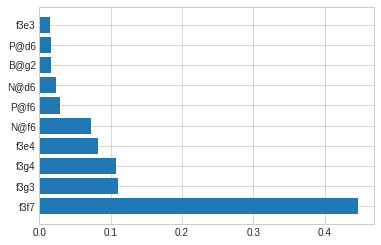

In [21]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

### Evalution using the MCTS-Agent

for i in range(10):
    value, selected_move, confidence, idx, centipawn, depth, nodes, time_elapsed_s, nps, pv = mcts_agent.perform_action(state)
    print("selected_move", selected_move.uci())

In [22]:
l = [1,2,3,4,5]

In [23]:
np.random.randint(0, 2)

1

In [24]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = mcts_agent.evaluate_board_state(state)
print('Elapsed time: %.4fs' % (time()-t_s))

start inference thread...
self.thread_inference.isAlive() True
start inference thread...
self.thread_inference.isAlive() True
2019-03-27 20:05:35 root[18264] DEBUG Starting a brand new search tree...
info score cp -43 depth 9 nodes 129 pv f3f7 e8f7 N@g5 f7e8 P@f7 e8d8 Q@g8 e7g8 f7f8q
2019-03-27 20:05:35 root[18264] DEBUG Update info
info score cp -260 depth 11 nodes 273 pv f3f7 e8f7 N@g5 f7e8 P@f7 e8d8 Q@g8 Q@f8 g8h8 f8h8 R@g8
2019-03-27 20:05:36 root[18264] DEBUG Update info
info score cp -1412 depth 7 nodes 385 pv f3g4 N@f3 g1f1 f3d4 g4g7 P@g2 f1g1
2019-03-27 20:05:36 root[18264] DEBUG Update info
info score cp -1016 depth 9 nodes 529 pv f3f7 e8f7 N@g5 f7e8 P@f7 e8d8 P@f3 Q@e1 g1g2
2019-03-27 20:05:37 root[18264] DEBUG Update info
info score cp 101 depth 10 nodes 657 pv f3f7 e8f7 N@g5 f7e8 B@h5 g7g6 P@f7 e8d8 Q@g8 e7g8
2019-03-27 20:05:37 root[18264] DEBUG Update info
info score cp 27 depth 9 nodes 817 pv N@f6 e8d8 f6e4 d5e4 f3f7 N@f3 g1f1 N@d2 f1e2
2019-03-27 20:05:38 root[18264] DE

info score cp 9999 depth 15 nodes 6657 pv N@f6 e8f8 P@h6 g7f6 e5f6 e4f3 P@g7 f8e8 g7h8q N@g8 R@f8 e8f8 Q@d8 N@e8 B@g7
2019-03-27 20:05:59 root[18264] DEBUG Update info
info score cp 762 depth 20 nodes 6785 pv N@f6 e8f8 P@h6 g7f6 e5f6 e4f3 P@g7 f8e8 g7h8q Q@g8 h8g8 e7g8 R@f8 e8f8 B@e7 g8e7 f6e7 f8e7 N@g8 e7d6
2019-03-27 20:06:00 root[18264] DEBUG Update info
info score cp 1360 depth 16 nodes 6913 pv N@f6 e8f8 Q@d8 N@e8 f6e8 e4f3 e8f6 Q@e8 f6e8 d7e8 d8e7 f8e7 P@f6 g7f6 e5f6 e7d7
2019-03-27 20:06:00 root[18264] DEBUG Update info
info score cp 1840 depth 8 nodes 7057 pv N@f6 e8f8 P@h6 g7f6 e5f6 N@f5 P@g7 f5g7
2019-03-27 20:06:01 root[18264] DEBUG Update info
info score cp 748 depth 20 nodes 7153 pv N@f6 e8f8 f6e4 d5e4 Q@d8 N@e8 d8e7 f8e7 P@f6 e8f6 e5f6 g7f6 f3f6 e7f6 B@e5 f6f5 N@e3 f5g6 N@f4 g6h6
2019-03-27 20:06:01 root[18264] DEBUG Update info
info score cp 9999 depth 15 nodes 7297 pv N@f6 g7f6 P@g7 h8g8 Q@f8 g8f8 g7f8q e8f8 B@h6 P@g7 h6g7 f8g7 f3f6 g7g8 R@h8
2019-03-27 20:06:02 root[182

info score cp 1310 depth 14 nodes 12705 pv N@f6 g7f6 P@g7 N@e2 g1f1 N@d2 b1d2 h8g8 d2e4 d5e4 f3f6 e2d4 Q@f8 g8f8
2019-03-27 20:06:25 root[18264] DEBUG Update info
info score cp 9999 depth 13 nodes 12817 pv N@f6 e8f8 P@h6 g7h6 B@g7 f8g7 f6h5 g7f8 Q@g7 f8e8 f3f7 e8d8 f7e7
2019-03-27 20:06:26 root[18264] DEBUG Update info
info score cp 482 depth 13 nodes 12945 pv N@f6 e8f8 P@h6 g7f6 e5f6 N@e2 g1f1 e4f3 f6e7 f8e7 P@f6 e7f6 B@e5
2019-03-27 20:06:26 root[18264] DEBUG Update info
info score cp 9999 depth 17 nodes 13057 pv N@f6 g7f6 P@g7 N@h3 f3h3 h8g8 e5f6 N@e2 g1f1 e2d4 Q@f8 g8f8 g7f8q e8f8 P@g7 f8e8 R@f8
2019-03-27 20:06:27 root[18264] DEBUG Update info
info score cp 177 depth 18 nodes 13185 pv N@f6 g7f6 P@g7 N@g6 g7h8q N@g8 f3f6 g6h8 f6h8 e4h1 N@f6 e8d8 R@f8 R@e8 f6e8 d7e8 f8e8 d8e8
2019-03-27 20:06:28 root[18264] DEBUG Update info
info score cp 324 depth 8 nodes 13297 pv N@f6 e8d8 P@d6 N@e2 g1f1 c7d6 e5d6 P@g2
2019-03-27 20:06:28 root[18264] DEBUG Update info
info score cp 1426 depth 16 n

KeyboardInterrupt: 

In [25]:
legal_moves

[Move.from_uci('f3f7'),
 Move.from_uci('f3f6'),
 Move.from_uci('f3h5'),
 Move.from_uci('f3f5'),
 Move.from_uci('f3g4'),
 Move.from_uci('f3f4'),
 Move.from_uci('f3e4'),
 Move.from_uci('f3h3'),
 Move.from_uci('f3g3'),
 Move.from_uci('f3e3'),
 Move.from_uci('f3d3'),
 Move.from_uci('f3c3'),
 Move.from_uci('f3b3'),
 Move.from_uci('f3a3'),
 Move.from_uci('f3g2'),
 Move.from_uci('f3e2'),
 Move.from_uci('f3d1'),
 Move.from_uci('g1g2'),
 Move.from_uci('g1f1'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('b1d2'),
 Move.from_uci('h2h3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4'),
 Move.from_uci('B@c1'),
 Move.from_uci('N@c1'),
 Move.from_uci('Q@c1'),
 Move.from_uci('B@d1'),
 Move.from_uci('N@d1'),
 Move.from_uci('Q@d1'),
 Move.from_uci('B@e1'),
 Move.from_uci('N@e1'),
 Move.from_uci('Q@e1'),
 Move.from_uci('B@f1'),
 Move.from_uci('N@f1'),
 Move.from_uci('

In [26]:
len(legal_moves)

170

In [27]:
mcts_agent.root_node.child_number_visits.argmax()

13

In [28]:
mcts_agent.root_node.q_value[28]

-0.9085127115249634

In [29]:
legal_moves[28]

Move.from_uci('b2b4')

In [30]:
l

[1, 2, 3, 4, 5]

In [31]:
legal_moves[131]

Move.from_uci('P@a6')

In [32]:
mcts_agent.root_node.q_value.argmax()

13

In [33]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = mcts_agent.evaluate_board_state(state)
print('Elapsed time: %.4fs' % (time()-t_s))

2019-03-27 20:02:11 root[29659] DEBUG Reuse the search tree. Number of nodes in search tree: 0
info score cp -2324 depth 3 nodes 13537 pv B@f6 e4f3 f6g7
2019-03-27 20:02:12 root[29659] DEBUG Update info
info score cp -130 depth 17 nodes 13713 pv f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 P@f6 e4d3 c2d3 b5d3 B@e2 d3e2 f1e2 f3d4 e2d2 B@g5 B@e3
2019-03-27 20:02:13 root[29659] DEBUG Update info
info score cp -182 depth 8 nodes 13873 pv f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 P@h6 b5d3
2019-03-27 20:02:13 root[29659] DEBUG Update info
info score cp -740 depth 13 nodes 14017 pv f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 P@f6 e4d3 c2d3 b5d3 a3d3 B@e4 N@b8
2019-03-27 20:02:14 root[29659] DEBUG Update info
info score cp -1329 depth 21 nodes 14161 pv f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 P@f6 b5d3 c2d3 e4d3 f1g2 f3h4 g2h3 B@g2 h3h4 e7f5 h4g4 d3e2 f2f3 e2f3 a3f3
2019-03-27 20:02:14 root[29659] DEBUG Update info
info score cp 542 depth 16 nodes 14305 pv f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 N@h5 b5d3 c2d3 e4d3 P@e2 P@g2 f1g2 f3h4 g2g1 d3e4
2019-03-

info string move overhead is -35779ms
f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 N@h5 f3e5 h5g7 e8d8 d4e5 P@g2 f1e2 g2h1q a3e7 d8c8 Q@f8 h8f8 e7f8 R@e8 N@e7 c8d8 e7c6 b7c6 P@e7 0.07281841121822874
2019-03-27 20:02:36 root[29659] INFO info string score cp -55 depth 40 nodes 5712 time 24230 nps 235 pv f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 N@h5 f3e5 h5g7 e8d8 d4e5 P@g2 f1e2 g2h1q a3e7 d8c8 Q@f8 h8f8 e7f8 R@e8 N@e7 c8d8 e7c6 b7c6 P@e7 d8c8 R@d8 c8b7 N@c5 b7b6 c5d7 b6a6 d3b5 c6b5 d7c5 a6b6 c5d7 b6a6 d7c5 a6b6 f8h8
Elapsed time: 24.2319s


In [34]:
from DeepCrazyhouse.src.domain.agent.player.alpha_beta.minimax_agent import AlphaBetaAgent

In [35]:
# minimax(currentPosition, 3, -∞, +∞, true)

In [36]:
ab_agent = AlphaBetaAgent(net=nets[0])

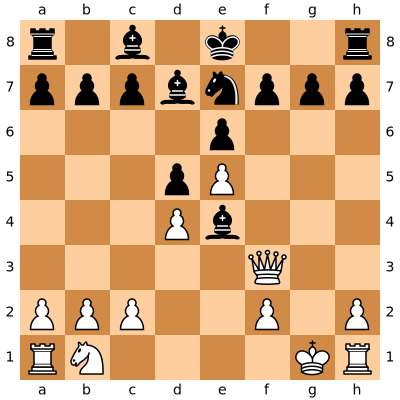

In [37]:
state.board

In [38]:
ab_agent.best_moves

[None]

In [39]:
ab_agent.best_moves

[None]

In [40]:
[3,4] + [3]

[3, 4, 3]

In [41]:
list(board.generate_legal_captures())

[Move.from_uci('f3f7'), Move.from_uci('f3e4')]

In [42]:
int(True)

1

In [43]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = ab_agent.evaluate_board_state(
    state, depth=5)
print('Elapsed time: %.4fs' % (time()-t_s))

value [0.92249376]
2019-03-27 20:02:41 root[29659] INFO [Move.from_uci('Q@f8'), Move.from_uci('h8g8'), Move.from_uci('N@f6'), Move.from_uci('e8f8'), Move.from_uci('f6d7')]
2019-03-27 20:02:41 root[29659] INFO Value: [0.92249376], Centipawn: [1402.6848]
Elapsed time: 4.5417s


In [44]:
t_s = time()
pred_value, legal_moves, p_vec_small, cp, depth, nodes, time_elapsed_s, nps, pv = ab_agent.evaluate_board_state(
    state, depth=1)
print('Elapsed time: %.4fs' % (time()-t_s))

value [0.7009132]
2019-03-27 20:02:41 root[29659] INFO [Move.from_uci('Q@f8')]
2019-03-27 20:02:41 root[29659] INFO Value: [0.7009132], Centipawn: [662.02893]
Elapsed time: 0.0551s


In [45]:
ab_agent.best_moves

[Move.from_uci('Q@f8')]

In [46]:
mcts_agent.root_node.n_sum

19057

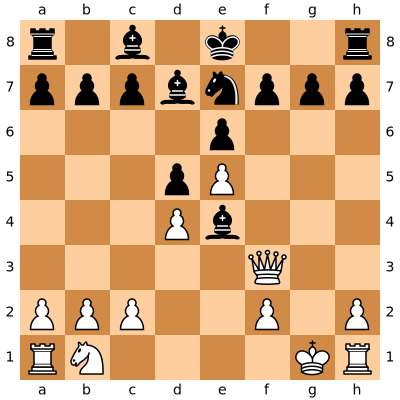

In [47]:
board

In [48]:
for i, child_node in enumerate(mcts_agent.root_node.child_nodes):
    if child_node.initial_value < 0:
        print(legal_moves[i], child_node.initial_value)

In [49]:
mcts_agent.root_node.legal_moves[mcts_agent.root_node.child_number_visits.argmax()]

Move.from_uci('f3a3')

In [50]:
mcts_agent.root_node.legal_moves[mcts_agent.root_node.q_value.argmax()]

Move.from_uci('f3a3')

In [51]:
pb_c_base = 19652 / 10
pb_c_init = 3.6
import math
cpuct = math.log((3000 + pb_c_base + 1) / pb_c_base) + pb_c_init

In [52]:
cpuct

4.527060938824912

In [53]:
#c = (a * b ) + (0.3 * a + 0.7 * b)

In [54]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [55]:
mcts_agent.get_last_q_values(min_nb_visits=10)

f3a3 N@f3 g1f1 d7b5 B@d3 c8d7 N@h5 f3e5 h5g7 e8d8 d4e5 P@g2 f1e2 g2h1q a3e7 d8c8 Q@f8 h8f8 e7f8 R@e8 N@e7 c8d8 e7c6 b7c6 P@e7 0.07281841121822874


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07281841, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [56]:
np.sort(mcts_agent.root_node.child_number_visits)[::-1][:100]

array([1.4318e+04, 2.7570e+03, 1.0650e+03, 1.3500e+02, 8.4000e+01,
       5.5000e+01, 5.0000e+01, 4.3000e+01, 2.0000e+01, 1.8000e+01,
       1.7000e+01, 1.5000e+01, 1.4000e+01, 1.3000e+01, 1.2000e+01,
       1.2000e+01, 1.1000e+01, 1.0000e+01, 9.0000e+00, 9.0000e+00,
       9.0000e+00, 7.0000e+00, 7.0000e+00, 7.0000e+00, 7.0000e+00,
       7.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00, 5.0000e+00,
       5.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00, 5.0000e+00,
       4.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00, 4.0000e+00,
       4.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
       3.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
       2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e

2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos


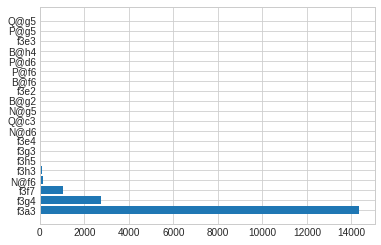

In [57]:
plot_moves_with_prob(legal_moves, mcts_agent.root_node.child_number_visits, only_top_x=20)

2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos


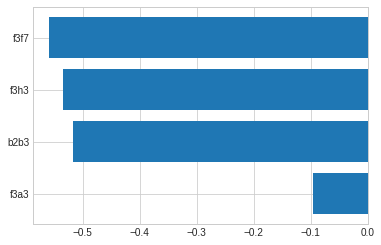

In [58]:
plot_moves_with_prob(legal_moves, mcts_agent.root_node.q_value, only_top_x=4)

2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:41 matplotlib.axes._base[29659] DEBUG update_title_pos


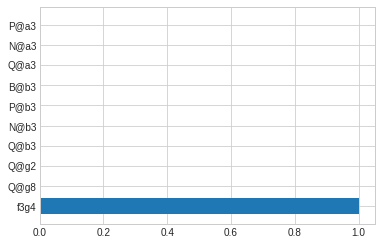

In [59]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

2019-03-27 20:02:42 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:42 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:42 matplotlib.axes._base[29659] DEBUG update_title_pos
2019-03-27 20:02:42 matplotlib.axes._base[29659] DEBUG update_title_pos


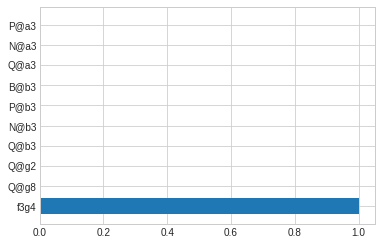

In [60]:
plot_moves_with_prob(legal_moves, p_vec_small, only_top_x=10)

In [61]:


%load_ext line_profiler
r = %lprun -r -f mcts_agent._run_single_playout mcts_agent._run_single_playout(mcts_agent.root_node)
r.print_stats()



Timer unit: 1e-06 s

Total time: 0.000524 s
File: ../../../DeepCrazyhouse/src/domain/agent/player/mcts_agent.py
Function: _run_single_playout at line 545

Line #      Hits         Time  Per Hit   % Time  Line Contents
   545                                               def _run_single_playout(self, parent_node: Node, pipe_id=0, depth=1, chosen_nodes=None):
   546                                                   """
   547                                                   This function works recursively until a leaf or terminal node is reached.
   548                                                   It ends by back-propagating the value of the new expanded node or by propagating the value of a terminal state.
   549                                           
   550                                                   :param state: Current game-state for the evaluation. This state differs between the treads
   551                                                   :param parent_node: Curr

In [62]:
from DeepCrazyhouse.src.domain.crazyhouse.input_representation import board_to_planes


In [63]:
%load_ext line_profiler
r = %lprun -r -f board_to_planes board_to_planes(board)
r.print_stats()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Timer unit: 1e-06 s

Total time: 0.001019 s
File: ../../../DeepCrazyhouse/src/domain/crazyhouse/input_representation.py
Function: board_to_planes at line 27

Line #      Hits         Time  Per Hit   % Time  Line Contents
    27                                           def board_to_planes(board, board_occ=0, normalize=True):
    28                                               """
    29                                               Gets the plane representation of a given board state.
    30                                               (Now history of past board positions is used.)
    31                                           
    32                                               ## Crazyhouse:
    33                                           
    34                                               Feature | Planes
    35                                           
    36                     

In [64]:
%load_ext line_profiler
r = %lprun -r -f board_to_planes board_to_planes(board)
r.print_stats()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
Timer unit: 1e-06 s

Total time: 0.000564 s
File: ../../../DeepCrazyhouse/src/domain/crazyhouse/input_representation.py
Function: board_to_planes at line 27

Line #      Hits         Time  Per Hit   % Time  Line Contents
    27                                           def board_to_planes(board, board_occ=0, normalize=True):
    28                                               """
    29                                               Gets the plane representation of a given board state.
    30                                               (Now history of past board positions is used.)
    31                                           
    32                                               ## Crazyhouse:
    33                                           
    34                                               Feature | Planes
    35                                           
    36                     